## Importing Libraries 

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import sklearn
%matplotlib inline

## Loading the Data Set 

In [6]:
df = pd.read_csv("cpcb_dly_aq_tamil_nadu-2014.csv")
df = df.rename(columns={'RSPM/PM10': 'RSPMorPM10'})
df

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPMorPM10,PM 2.5
0,38,01-02-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,11.0,17.0,55.0,NaN
1,38,01-07-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,17.0,45.0,NaN
2,38,21-01-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,12.0,18.0,50.0,NaN
3,38,23-01-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,15.0,16.0,46.0,NaN
4,38,28-01-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,14.0,42.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2874,773,12-03-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",15.0,18.0,102.0,NaN
2875,773,12-10-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",12.0,14.0,91.0,NaN
2876,773,17-12-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",19.0,22.0,100.0,NaN
2877,773,24-12-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",15.0,17.0,95.0,NaN


## Exploring the Data Set 

In [7]:
print(df.head())

   Stn Code Sampling Date       State City/Town/Village/Area  \
0        38    01-02-2014  Tamil Nadu                Chennai   
1        38    01-07-2014  Tamil Nadu                Chennai   
2        38    21-01-2014  Tamil Nadu                Chennai   
3        38    23-01-2014  Tamil Nadu                Chennai   
4        38    28-01-2014  Tamil Nadu                Chennai   

                     Location of Monitoring Station  \
0  Kathivakkam, Municipal Kalyana Mandapam, Chennai   
1  Kathivakkam, Municipal Kalyana Mandapam, Chennai   
2  Kathivakkam, Municipal Kalyana Mandapam, Chennai   
3  Kathivakkam, Municipal Kalyana Mandapam, Chennai   
4  Kathivakkam, Municipal Kalyana Mandapam, Chennai   

                                    Agency Type of Location   SO2   NO2  \
0  Tamilnadu State Pollution Control Board  Industrial Area  11.0  17.0   
1  Tamilnadu State Pollution Control Board  Industrial Area  13.0  17.0   
2  Tamilnadu State Pollution Control Board  Industrial Area

In [8]:
print(df.tail())

      Stn Code Sampling Date       State City/Town/Village/Area  \
2874       773    12-03-2014  Tamil Nadu                 Trichy   
2875       773    12-10-2014  Tamil Nadu                 Trichy   
2876       773    17-12-2014  Tamil Nadu                 Trichy   
2877       773    24-12-2014  Tamil Nadu                 Trichy   
2878       773    31-12-2014  Tamil Nadu                 Trichy   

     Location of Monitoring Station                                   Agency  \
2874      Central Bus Stand, Trichy  Tamilnadu State Pollution Control Board   
2875      Central Bus Stand, Trichy  Tamilnadu State Pollution Control Board   
2876      Central Bus Stand, Trichy  Tamilnadu State Pollution Control Board   
2877      Central Bus Stand, Trichy  Tamilnadu State Pollution Control Board   
2878      Central Bus Stand, Trichy  Tamilnadu State Pollution Control Board   

                        Type of Location   SO2   NO2  RSPMorPM10  PM 2.5  
2874  Residential, Rural and other Areas 

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Stn Code                        2879 non-null   int64  
 1   Sampling Date                   2879 non-null   object 
 2   State                           2879 non-null   object 
 3   City/Town/Village/Area          2879 non-null   object 
 4   Location of Monitoring Station  2879 non-null   object 
 5   Agency                          2879 non-null   object 
 6   Type of Location                2879 non-null   object 
 7   SO2                             2868 non-null   float64
 8   NO2                             2866 non-null   float64
 9   RSPMorPM10                      2875 non-null   float64
 10  PM 2.5                          0 non-null      float64
dtypes: float64(4), int64(1), object(6)
memory usage: 247.5+ KB
None


In [10]:
print(df.describe())

          Stn Code          SO2          NO2   RSPMorPM10  PM 2.5
count  2879.000000  2868.000000  2866.000000  2875.000000     0.0
mean    475.750261    11.503138    22.136776    62.494261     NaN
std     277.675577     5.051702     7.128694    31.368745     NaN
min      38.000000     2.000000     5.000000    12.000000     NaN
25%     238.000000     8.000000    17.000000    41.000000     NaN
50%     366.000000    12.000000    22.000000    55.000000     NaN
75%     764.000000    15.000000    25.000000    78.000000     NaN
max     773.000000    49.000000    71.000000   269.000000     NaN


## Identifying null Values 

In [11]:
print(df.isnull())

      Stn Code  Sampling Date  State  City/Town/Village/Area  \
0        False          False  False                   False   
1        False          False  False                   False   
2        False          False  False                   False   
3        False          False  False                   False   
4        False          False  False                   False   
...        ...            ...    ...                     ...   
2874     False          False  False                   False   
2875     False          False  False                   False   
2876     False          False  False                   False   
2877     False          False  False                   False   
2878     False          False  False                   False   

      Location of Monitoring Station  Agency  Type of Location    SO2    NO2  \
0                              False   False             False  False  False   
1                              False   False             False  False  

In [12]:
c = df.isnull().sum()
print(c)

Stn Code                             0
Sampling Date                        0
State                                0
City/Town/Village/Area               0
Location of Monitoring Station       0
Agency                               0
Type of Location                     0
SO2                                 11
NO2                                 13
RSPMorPM10                           4
PM 2.5                            2879
dtype: int64


In [13]:
print('Total Sum of null values in the Data set = ',c.sum())

Total Sum of null values in the Data set =  2907


In [14]:
print(df['RSPMorPM10'].value_counts()) #frequency of values 

47.0     64
41.0     62
43.0     59
51.0     58
40.0     58
         ..
163.0     1
138.0     1
211.0     1
202.0     1
238.0     1
Name: RSPMorPM10, Length: 169, dtype: int64


## Data Preprocessing - Replacing the null values 

In [15]:
df.drop_duplicates()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPMorPM10,PM 2.5
0,38,01-02-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,11.0,17.0,55.0,NaN
1,38,01-07-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,17.0,45.0,NaN
2,38,21-01-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,12.0,18.0,50.0,NaN
3,38,23-01-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,15.0,16.0,46.0,NaN
4,38,28-01-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,14.0,42.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2874,773,12-03-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",15.0,18.0,102.0,NaN
2875,773,12-10-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",12.0,14.0,91.0,NaN
2876,773,17-12-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",19.0,22.0,100.0,NaN
2877,773,24-12-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",15.0,17.0,95.0,NaN


In [16]:
df.fillna(0)

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPMorPM10,PM 2.5
0,38,01-02-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,11.0,17.0,55.0,0.0
1,38,01-07-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,17.0,45.0,0.0
2,38,21-01-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,12.0,18.0,50.0,0.0
3,38,23-01-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,15.0,16.0,46.0,0.0
4,38,28-01-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,14.0,42.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2874,773,12-03-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",15.0,18.0,102.0,0.0
2875,773,12-10-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",12.0,14.0,91.0,0.0
2876,773,17-12-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",19.0,22.0,100.0,0.0
2877,773,24-12-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",15.0,17.0,95.0,0.0


In [17]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2874    False
2875    False
2876    False
2877    False
2878    False
Length: 2879, dtype: bool

## Data Normalization 

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Values_standardized'] = scaler.fit_transform(df[['RSPMorPM10']])

In [19]:
scaler = StandardScaler()
df['Values_standardized'] = scaler.fit_transform(df[['RSPMorPM10']])
df

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPMorPM10,PM 2.5,Values_standardized
0,38,01-02-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,11.0,17.0,55.0,NaN,-0.238950
1,38,01-07-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,17.0,45.0,NaN,-0.557794
2,38,21-01-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,12.0,18.0,50.0,NaN,-0.398372
3,38,23-01-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,15.0,16.0,46.0,NaN,-0.525910
4,38,28-01-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,14.0,42.0,NaN,-0.653447
...,...,...,...,...,...,...,...,...,...,...,...,...
2874,773,12-03-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",15.0,18.0,102.0,NaN,1.259617
2875,773,12-10-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",12.0,14.0,91.0,NaN,0.908889
2876,773,17-12-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",19.0,22.0,100.0,NaN,1.195848
2877,773,24-12-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",15.0,17.0,95.0,NaN,1.036426


## Data Visualisation

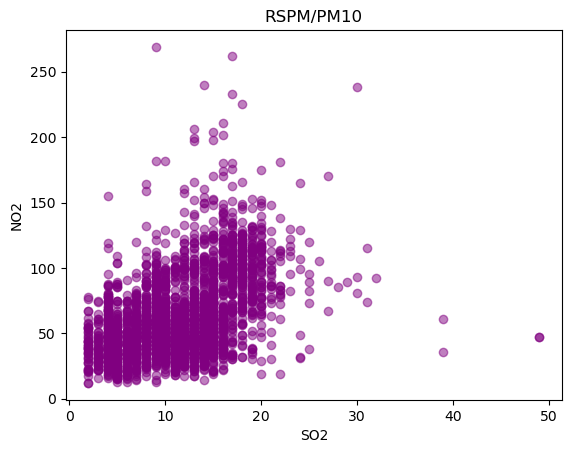

In [20]:
# Scatter Plot:
plt.scatter(df['SO2'], df['RSPMorPM10'], alpha=0.5, color='purple')
plt.title('RSPM/PM10')
plt.xlabel('SO2')
plt.ylabel('NO2')
plt.show()

## Data Analysis using different models 

### Simple Linear Regression 

In [22]:
cdf = df[['SO2','NO2','RSPMorPM10']]
cdf.head(9)

,SO2,NO2,RSPMorPM10
0,11.0,17.0,55.0
1,13.0,17.0,45.0
2,12.0,18.0,50.0
3,15.0,16.0,46.0
4,13.0,14.0,42.0
5,14.0,18.0,43.0
6,12.0,17.0,51.0
7,13.0,16.0,46.0
8,10.0,19.0,50.0


In [23]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [24]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train = train.dropna()
x = np.asanyarray(train[['SO2', 'NO2']])
y = np.asanyarray(train[['RSPMorPM10']])
regr.fit(x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[2.80336749 0.18971444]]


In [25]:
test = test.dropna()
y_hat= regr.predict(test[['SO2','NO2']])
x = np.asanyarray(test[['SO2','NO2']])
y = np.asanyarray(test[['RSPMorPM10']])
print("Mean Squared Error (MSE) : %.2f"
% np.mean((y_hat - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Mean Squared Error (MSE) : 794.16
Variance score: 0.19


C:\Users\savio\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


the results show that due to the low variance score this Model is not fit to predict the data of this type 

### Random forest Algorithm 

C:\Users\savio\AppData\Local\Temp\ipykernel_6284\3394349289.py:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


Mean Squared Error: 775.49
R-squared (R2) Score: 0.25


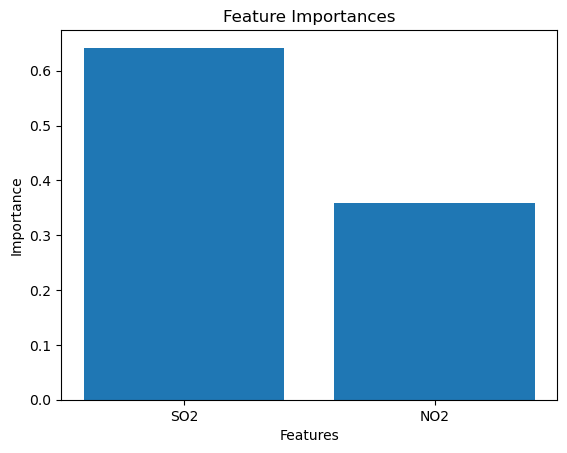

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset from the CSV file
data = pd.read_csv("cpcb_dly_aq_tamil_nadu-2014.csv")  # Adjust the filename as needed

# Handle missing values by filling with the mean
data = data.fillna(data.mean())

# Select the relevant features (SO2 and NO2) and the target variable (RSPM/PM10)
features = data[["SO2", "NO2"]]
target = data["RSPM/PM10"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

# Visualize the feature importances
feature_importances = rf_model.feature_importances_
plt.bar(features.columns, feature_importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()



### Regression with the Gradient Boosting algorithm

C:\Users\savio\AppData\Local\Temp\ipykernel_6284\2929334411.py:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


Mean Squared Error: 684.02
R-squared (R2) Score: 0.34


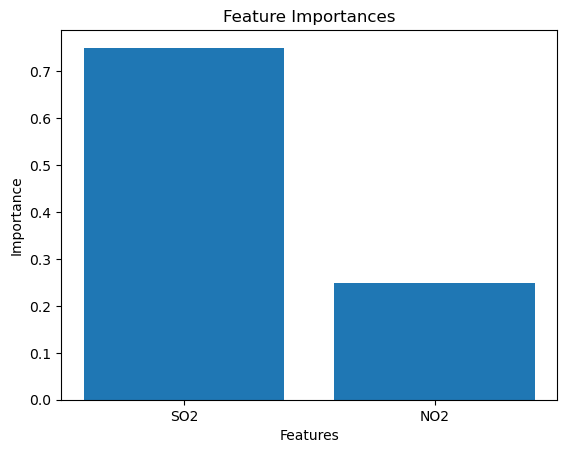

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset from the CSV file
data = pd.read_csv("cpcb_dly_aq_tamil_nadu-2014.csv")  # Adjust the filename as needed

# Handle missing values by filling with the mean
data = data.fillna(data.mean())

# Select the relevant features (SO2 and NO2) and the target variable (RSPM/PM10)
features = data[["SO2", "NO2"]]
target = data["RSPM/PM10"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Calculate model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

# Visualize the feature importances
feature_importances = gb_model.feature_importances_
plt.bar(features.columns, feature_importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()


### Gaussian Process Regression (GPR)

C:\Users\savio\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\savio\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


RMSE: 33.17
R-squared: -0.05


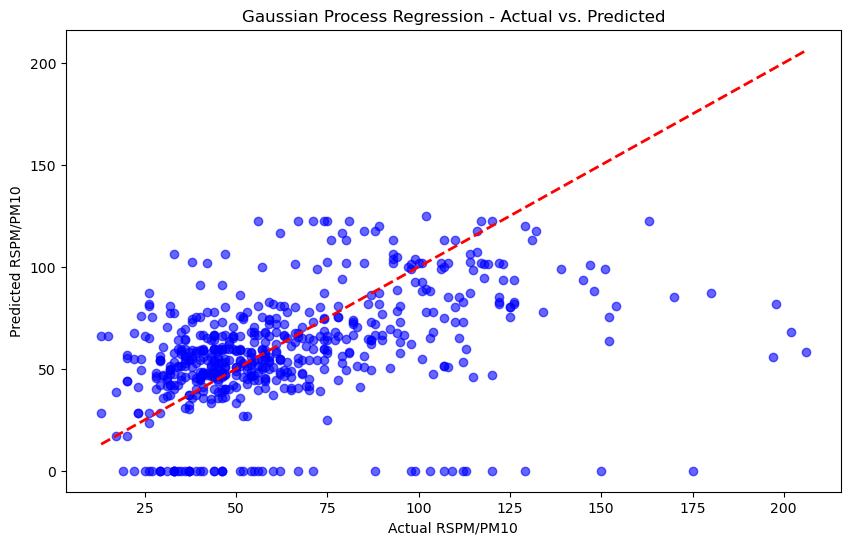

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import matplotlib.pyplot as plt

# Load your dataset, replace 'your_data.csv' with the actual file path
data = pd.read_csv('cpcb_dly_aq_tamil_nadu-2014.csv')

# Data Preprocessing
# Select relevant columns
data = data[['SO2', 'NO2', 'RSPM/PM10']]

# Check for missing values and handle them if necessary
data.dropna(inplace=True)

# Split the data into features (X) and target (y)
X = data[['SO2', 'NO2']].values
y = data['RSPM/PM10'].values

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Gaussian Process Kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))

# Create and train the Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)
gpr.fit(X_train, y_train)

# Make predictions
y_pred, sigma = gpr.predict(X_test, return_std=True)

# Evaluate the model (you can use various metrics, e.g., RMSE, R-squared)
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual RSPM/PM10')
plt.ylabel('Predicted RSPM/PM10')
plt.title('Gaussian Process Regression - Actual vs. Predicted')
plt.show()